In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [337]:
df = pd.read_csv('mnist_small.csv')
df_label_six = df['label'].loc[df['label']==6]
df_label_zero= df['label'].loc[df['label']==0]
df_zero=df.loc[df['label']==0].drop(columns='label')
df_six = df.loc[df['label']==6].drop(columns='label')

In [338]:
def show_image(df,labels,n=1):
    for i in range(n): 
        img_array = df.iloc[i].values.reshape(28, 28).astype(np.uint8)
        
        plt.imshow(img_array, cmap='gray')
        plt.title(f'Label: {labels.iloc[i]}')
        plt.show()

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from PIL import Image

читаем файл задаем датафреймы нулей и шестерок и их лейблов

In [340]:
df = pd.read_csv('mnist_small.csv')
df_label = df['label']
df_zero = df.loc[df['label'] == 0].drop(columns='label')
df_six = df.loc[df['label'] == 6].drop(columns='label')
df_no_label = df.drop(columns=['label'])

функция для вывода картинок

In [341]:
def show_images(df, labels, n=5, title=""):
    fig, axes = plt.subplots(1, n, figsize=(15, 3))
    fig.suptitle(title, fontsize=14)
    
    for i in range(n):
        img_array = df.iloc[i].values.reshape(28, 28).astype(np.uint8)
        axes[i].imshow(img_array, cmap='gray')
        axes[i].set_title(f'Label: {labels.iloc[i] if hasattr(labels, "iloc") else labels}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()


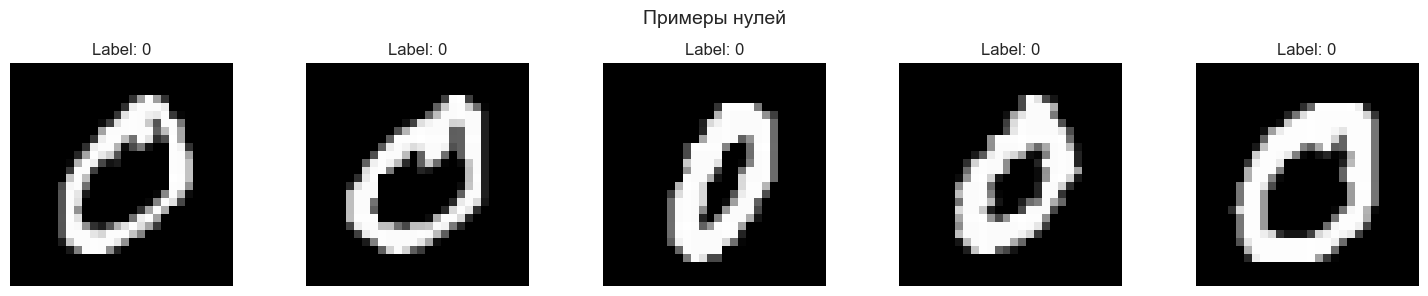

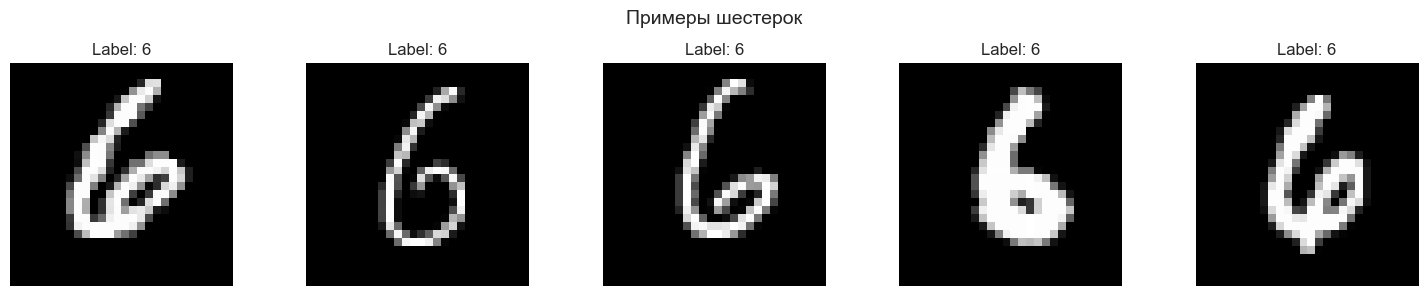

In [342]:
show_images(df_zero, df.loc[df['label'] == 0, 'label'], n=5, title="Примеры нулей")
show_images(df_six, df.loc[df['label'] == 6, 'label'], n=5, title="Примеры шестерок")

In [343]:
print(f"Нули - среднее: {df_zero.mean().mean()}, стд: {df_zero.std().mean()}")
print(f"Шестерки - среднее: {df_six.mean().mean()}, стд: {df_six.std().mean()}")

Нули - среднее: 44.2168279053982, стд: 44.958012176855306
Шестерки - среднее: 35.14171589688507, стд: 35.686206261524006


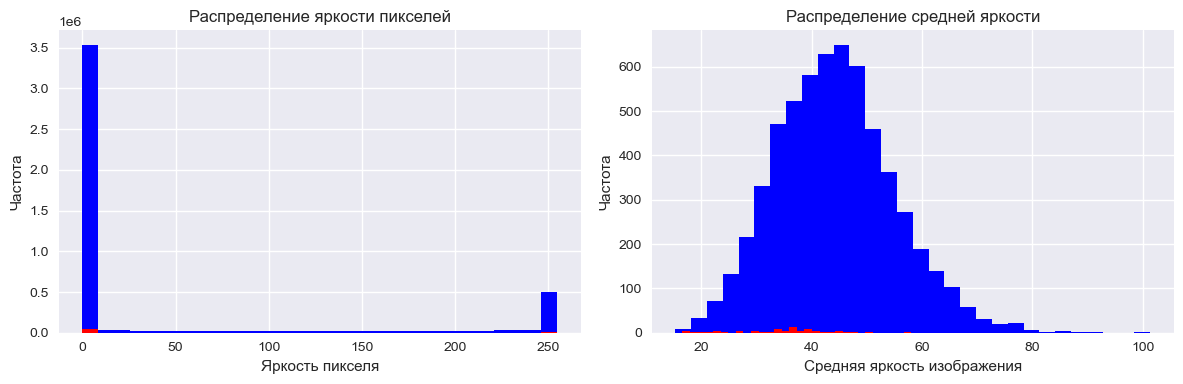

In [344]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_zero.values.flatten(), bins=30, label='Нули', color='blue')
plt.hist(df_six.values.flatten(), bins=30, label='Шестерки', color='red')
plt.xlabel('Яркость пикселя')
plt.ylabel('Частота')
plt.title('Распределение яркости пикселей')

plt.subplot(1, 2, 2)


zero_means = df_zero.mean(axis=1)
six_means = df_six.mean(axis=1)
plt.hist(zero_means, bins=30, label='Нули', color='blue')
plt.hist(six_means, bins=30, label='Шестерки', color='red')
plt.xlabel('Средняя яркость изображения')
plt.ylabel('Частота')
plt.title('Распределение средней яркости')

plt.tight_layout()
plt.show()

In [345]:
X_all = np.vstack([df_zero.values, df_six.values])
y_all = np.hstack([np.zeros(len(df_zero)), np.ones(len(df_six))])
X_all, y_all

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([0., 0., 0., ..., 1., 1., 1.]))

нормализуем для правильной работы kpca

In [346]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)
print(f"После нормализации - среднее: {X_scaled.mean()}, стд: {X_scaled.std()}")
X_scaled
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))


После нормализации - среднее: -2.7813078891854946e-18, стд: 0.8541614816500994
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.73774120e-18 -5.92217649e-18
 -1.18443530e-18 -9.47548239e-18  3.55330590e-18 -1.18443530e-17
 -5.92217649e-19  5.62606767e-18  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.0000000

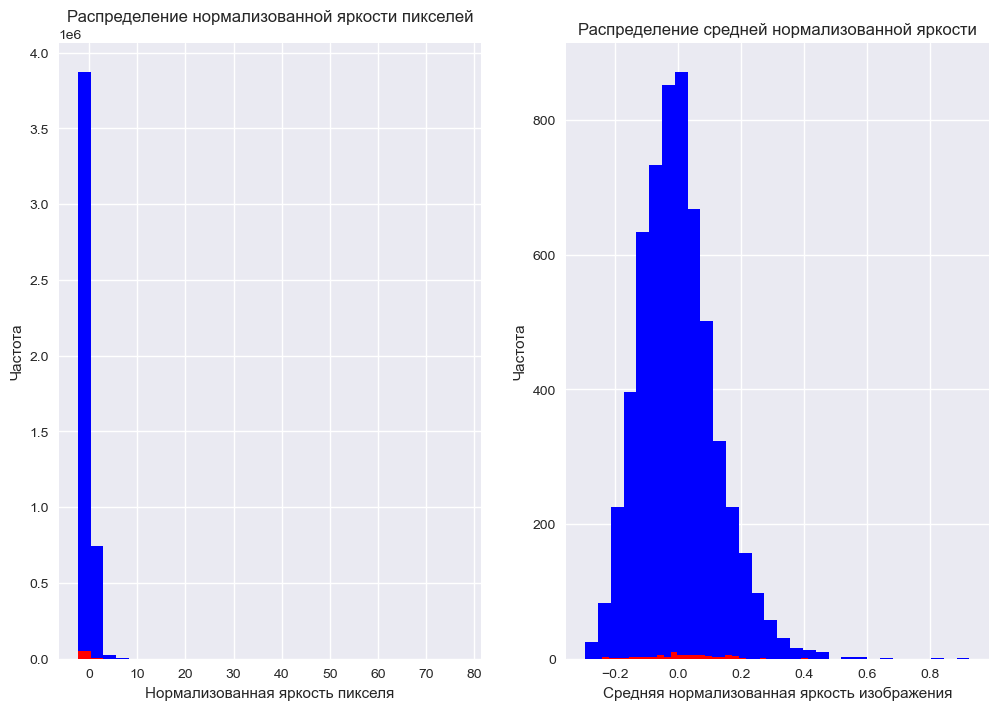

In [347]:
plt.subplot(1, 2, 1)
plt.hist(X_scaled[y_all == 0].flatten(), bins=30,label='Нули', color='blue')
plt.hist(X_scaled[y_all == 1].flatten(), bins=30, label='Шестерки', color='red')
plt.xlabel('Нормализованная яркость пикселя')
plt.ylabel('Частота')
plt.title('Распределение нормализованной яркости пикселей')


plt.subplot(1, 2, 2)
zero_means_scaled = X_scaled[y_all == 0].mean(axis=1)
six_means_scaled = X_scaled[y_all == 1].mean(axis=1)

plt.hist(zero_means_scaled, bins=30,label='Нули', color='blue')
plt.hist(six_means_scaled, bins=30,label='Шестерки', color='red')
plt.xlabel('Средняя нормализованная яркость изображения')
plt.ylabel('Частота')
plt.title('Распределение средней нормализованной яркости')


plt.show()


In [348]:
X_normal = X_scaled[y_all == 0] 
X_test = X_scaled
y_test = y_all

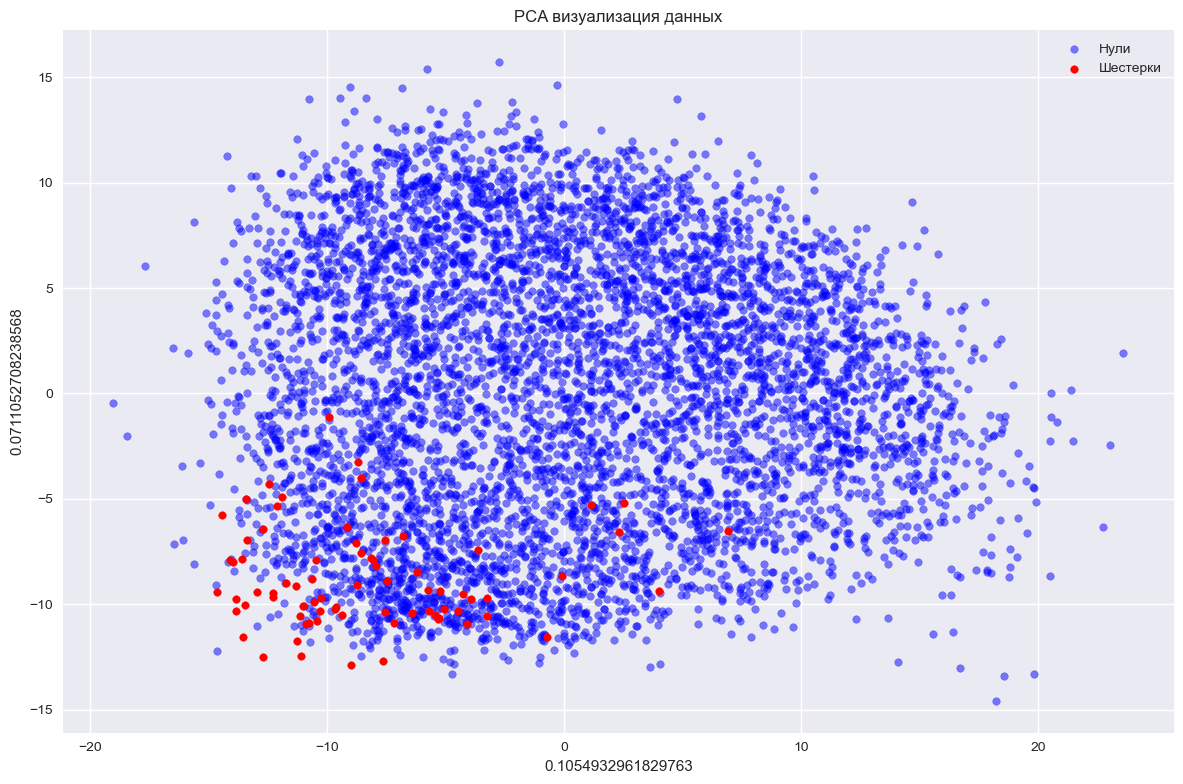

array([[ -4.19455339,   3.01896118],
       [ -3.86619324,   5.68192102],
       [-11.71673409,  -8.06784701],
       ...,
       [ -9.00220547, -12.86576244],
       [ -7.62971784, -12.70365398],
       [ -9.61176799, -10.13625979]])

In [349]:
from sklearn.decomposition import PCA
pca_for_viz = PCA(n_components=2)
X_pca = pca_for_viz.fit_transform(X_scaled)

plt.scatter(X_pca[y_all == 0, 0], X_pca[y_all == 0, 1], 
           alpha=0.5, s=30, c='blue', label='Нули')
plt.scatter(X_pca[y_all == 1, 0], X_pca[y_all == 1, 1], s=30, c='red', label='Шестерки')
plt.xlabel(pca_for_viz.explained_variance_ratio_[0])
plt.ylabel(pca_for_viz.explained_variance_ratio_[1])
plt.title('PCA визуализация данных')
plt.legend()

plt.tight_layout()
plt.show()
X_pca

функция для вычисления доля неверныз классификаций

In [350]:
def calculate_err(y_true, y_pred):
    return np.mean(y_true != y_pred)

сам kpca

In [351]:
def kpca_anomaly_detection(X_train, X_test, n_components=50, kernel='rbf', gamma=None):
    if gamma is None:
        gamma = 1.0 / X_train.shape[1]  # 1\число признаков
    
    kpca = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma, 
                     fit_inverse_transform=True, random_state=42)
    
    # Обучаем только на норм данных
    print(f"Обучение KPCA: ядро={kernel}, компоненты={n_components}, gamma={gamma:.6f}")
    kpca.fit(X_train)
    
    # Проецируем все данные в пространство главных компонент
    X_test_transformed = kpca.transform(X_test)
    
    # Восстанавливаем данные
    X_test_reconstructed = kpca.inverse_transform(X_test_transformed)
    
    # Вычисляем квадратич ошибку для каждого образца
    reconstruction_errors = np.sum((X_test - X_test_reconstructed) ** 2, axis=1)
    
    return kpca, reconstruction_errors, X_test_transformed

kernels_to_test = ['rbf', 'poly', 'sigmoid']
n_components_list = [10, 20, 50, 100]
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1.0]


best_config = None
best_err = 1000000000
results_log = []

In [352]:
for n_comp in [20, 50]:
    for gamma in [1e-3, 1e-2, 1e-1]:
        kpca, errors, transformed = kpca_anomaly_detection(
            X_normal, X_test, n_components=n_comp, kernel='rbf', gamma=gamma
        )
        
        # Определяем порог как 95-й процентиль ошибок на обучающих данных
        train_errors = errors[y_test == 0]  # Ошибки только для нулей
        threshold = np.percentile(train_errors, 95)
        
        # Предсказываем аномалии
        y_pred = (errors > threshold).astype(int)
        
        # Вычисляем ERR
        err = calculate_err(y_test, y_pred)
        
        # Сохраняем результат
        result = {
            'kernel': 'rbf',
            'n_components': n_comp,
            'gamma': gamma,
            'threshold': threshold,
            'err': err,
            'errors': errors
        }
        results_log.append(result)
        
        print(f"  n_comp={n_comp}, gamma={gamma:.3f}: ERR={err:.3f}, порог={threshold:.3f}")
        
        if err < best_err :
            best_err = err
            best_config = result


Обучение KPCA: ядро=rbf, компоненты=20, gamma=0.001000
  n_comp=20, gamma=0.001: ERR=0.052, порог=934.548
Обучение KPCA: ядро=rbf, компоненты=20, gamma=0.010000
  n_comp=20, gamma=0.010: ERR=0.052, порог=1053.191
Обучение KPCA: ядро=rbf, компоненты=20, gamma=0.100000
  n_comp=20, gamma=0.100: ERR=0.053, порог=1069.024
Обучение KPCA: ядро=rbf, компоненты=50, gamma=0.001000
  n_comp=50, gamma=0.001: ERR=0.052, порог=923.770
Обучение KPCA: ядро=rbf, компоненты=50, gamma=0.010000
  n_comp=50, gamma=0.010: ERR=0.052, порог=1052.130
Обучение KPCA: ядро=rbf, компоненты=50, gamma=0.100000
  n_comp=50, gamma=0.100: ERR=0.053, порог=1068.875


In [353]:
print(best_err)
print(best_config)

0.052175362560426736
{'kernel': 'rbf', 'n_components': 20, 'gamma': 0.001, 'threshold': 934.5477408573983, 'err': 0.052175362560426736, 'errors': array([ 125.50430997,  205.32310352,  344.67591024, ..., 1006.18077362,
       3824.23123694,  694.82009806])}


In [354]:
best_kpca, best_errors, best_transformed = kpca_anomaly_detection(
        X_normal, X_test, 
        n_components=best_config['n_components'], 
        kernel=best_config['kernel'], 
        gamma=best_config['gamma']
    )
    
threshold = best_config['threshold']
y_pred = (best_errors > threshold).astype(int)

Обучение KPCA: ядро=rbf, компоненты=20, gamma=0.001000


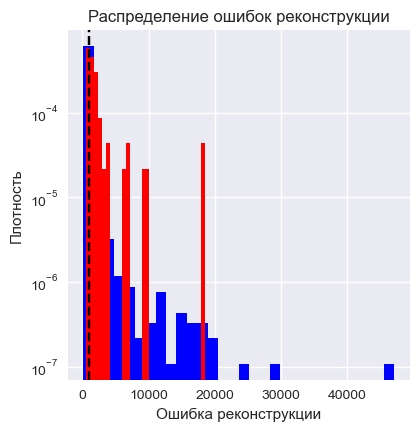

In [355]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(best_errors[y_test == 0], bins=30, label='Нули', color='blue', density=True)
plt.hist(best_errors[y_test == 1], bins=30, label='Шестерки', color='red', density=True)
plt.axvline(threshold, color='black', linestyle='--', label=f'Порог={threshold}')
plt.xlabel('Ошибка реконструкции')
plt.ylabel('Плотность')
plt.title('Распределение ошибок реконструкции')
plt.yscale('log')

Text(0.5, 1.0, 'Зависимость ERR от порога')

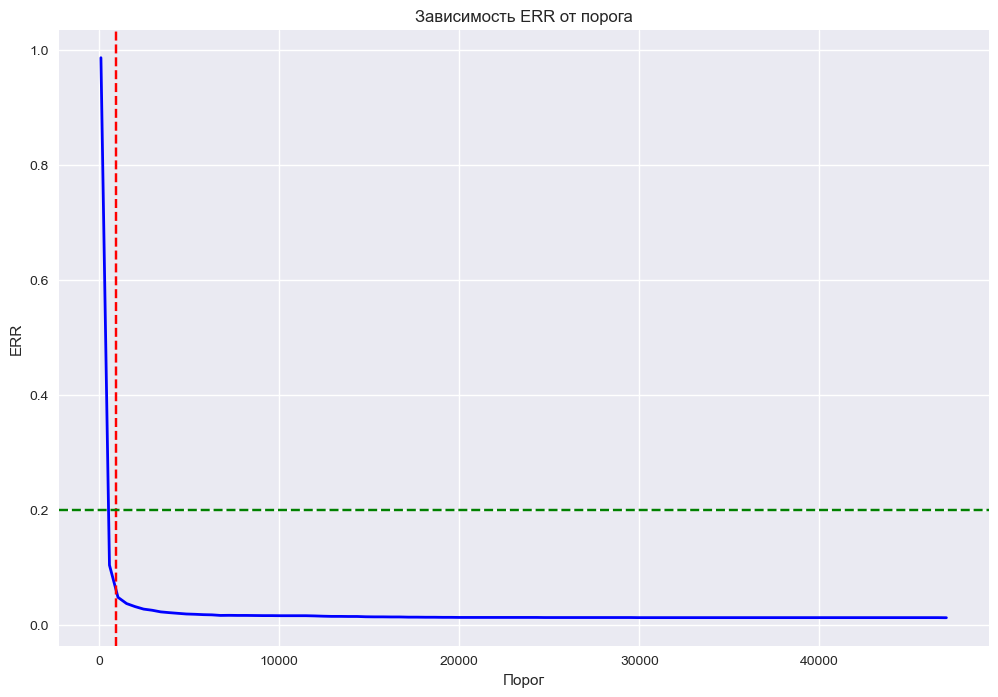

In [356]:
thresholds = np.linspace(np.min(best_errors), np.max(best_errors), 100)
errors_list = []

for t in thresholds:
    pred = (best_errors > t).astype(int)
    err = calculate_err(y_test, pred)
    errors_list.append(err)

plt.plot(thresholds, errors_list, 'b-', linewidth=2)
plt.axvline(threshold, color='red', linestyle='--', label=f'Выбранный порог')
plt.axhline(0.2, color='green', linestyle='--', label='Целевой ERR=0.2')
plt.xlabel('Порог')
plt.ylabel('ERR')
plt.title('Зависимость ERR от порога')

Text(0.5, 60.7222222222222, 'Предсказанные классы')

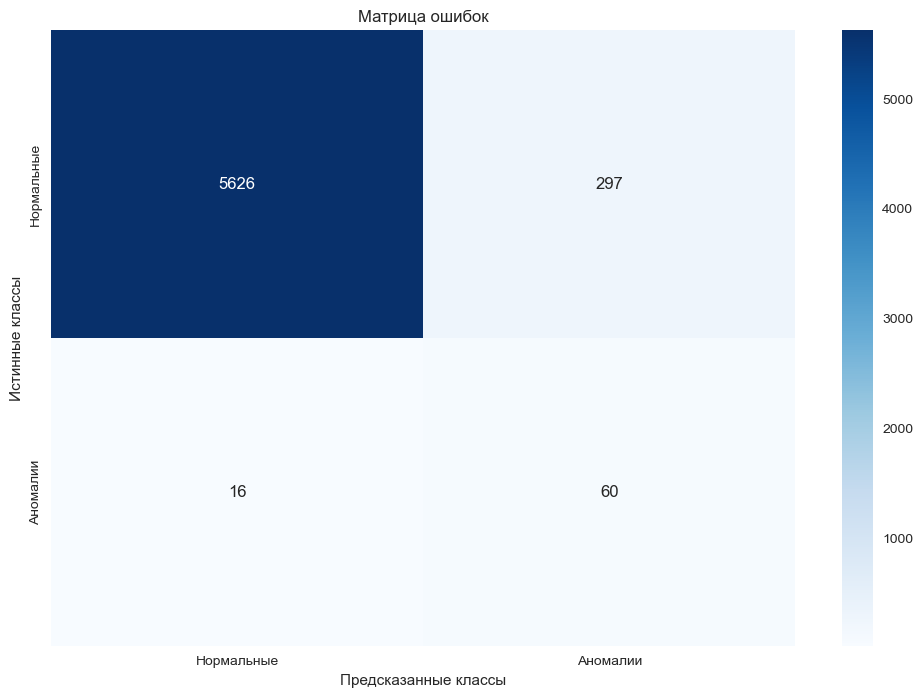

In [357]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues', 
            xticklabels=['Нормальные', 'Аномалии'],
            yticklabels=['Нормальные', 'Аномалии'])
plt.title('Матрица ошибок')
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')

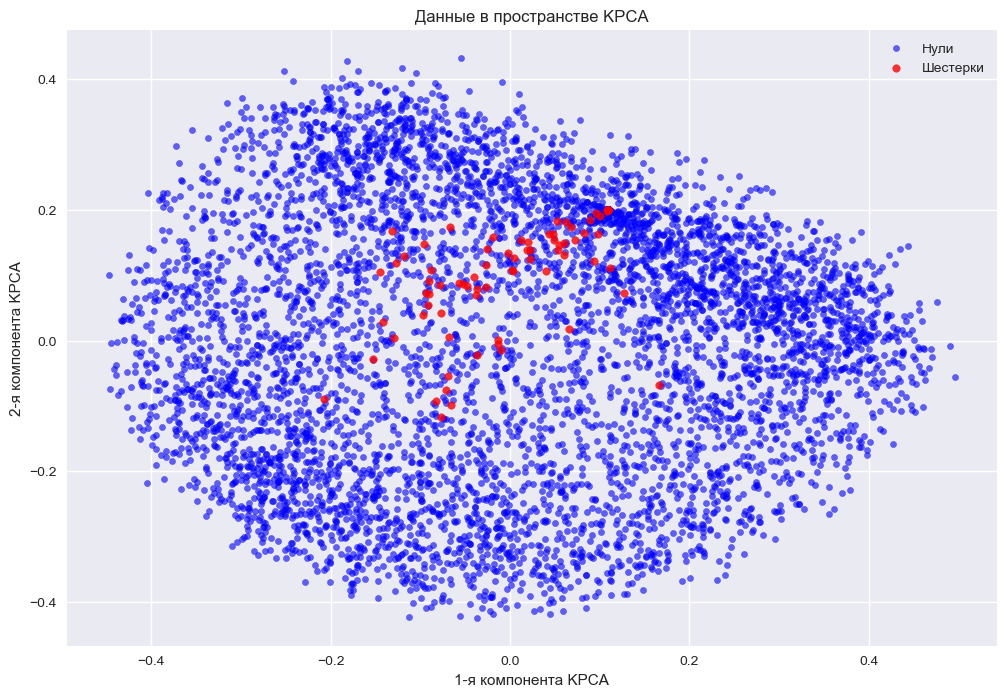

In [358]:
if best_transformed.shape[1] >= 2:
        scatter1 = plt.scatter(best_transformed[y_test == 0, 0], best_transformed[y_test == 0, 1], 
                   alpha=0.6, s=20, c='blue', label='Нули')
        scatter2 = plt.scatter(best_transformed[y_test == 1, 0], best_transformed[y_test == 1, 1], 
                   alpha=0.8, s=30, c='red', label='Шестерки')
        plt.xlabel('1-я компонента KPCA')
        plt.ylabel('2-я компонента KPCA')
        plt.title('Данные в пространстве KPCA')
        plt.legend()

In [359]:
correct_anomalies = np.where((y_test == 1) & (y_pred == 1))[0]
missed_anomalies = np.where((y_test == 1) & (y_pred == 0))[0]

print(f'Всего шестерок: {sum(y_test == 1)}')
print(f'Найдено: {len(correct_anomalies)}')
print(f'Пропущено: {len(missed_anomalies)}')
print(f'ERR: {best_err}')

false_positives = np.where((y_test == 0) & (y_pred == 1))[0]
print(f'Ложные срабатывания: {len(false_positives)}')
print(f'Точность на аномалиях: {len(correct_anomalies)/max(1,len(correct_anomalies)+len(missed_anomalies))}')
correct_anomalies


Всего шестерок: 76
Найдено: 60
Пропущено: 16
ERR: 0.052175362560426736
Ложные срабатывания: 297
Точность на аномалиях: 0.7894736842105263


array([5923, 5925, 5926, 5929, 5930, 5931, 5932, 5933, 5935, 5936, 5937,
       5938, 5939, 5940, 5941, 5942, 5944, 5945, 5946, 5948, 5950, 5951,
       5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959, 5960, 5962, 5964,
       5965, 5967, 5968, 5969, 5970, 5971, 5972, 5974, 5975, 5976, 5978,
       5980, 5981, 5983, 5984, 5985, 5986, 5987, 5988, 5989, 5990, 5992,
       5993, 5994, 5995, 5996, 5997], dtype=int64)

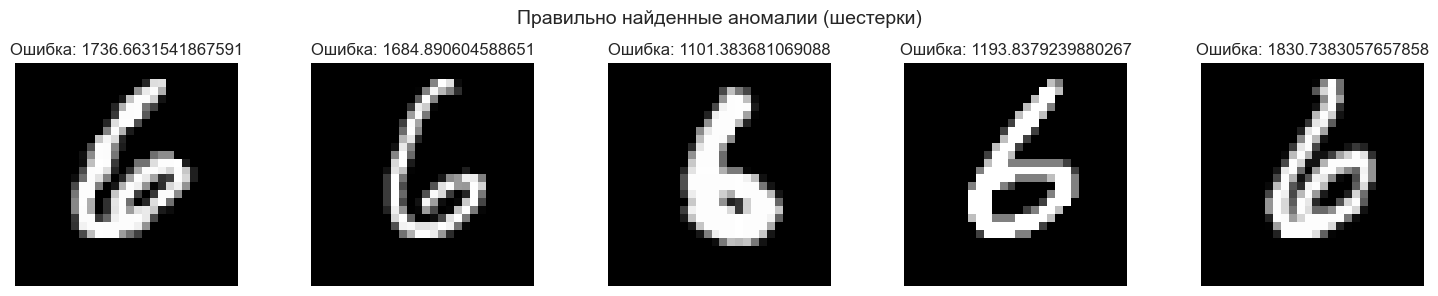

In [360]:
anomaly = correct_anomalies[:5] 
original_data = scaler.inverse_transform(X_test[anomaly])

fig, axes = plt.subplots(1, min(5, len(anomaly)), figsize=(15, 3))

for i, idx in enumerate(anomaly):
    img = original_data[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Ошибка: {best_errors[idx]}')
    axes[i].axis('off')

plt.suptitle('Правильно найденные аномалии (шестерки)', fontsize=14)
plt.tight_layout()
plt.show()

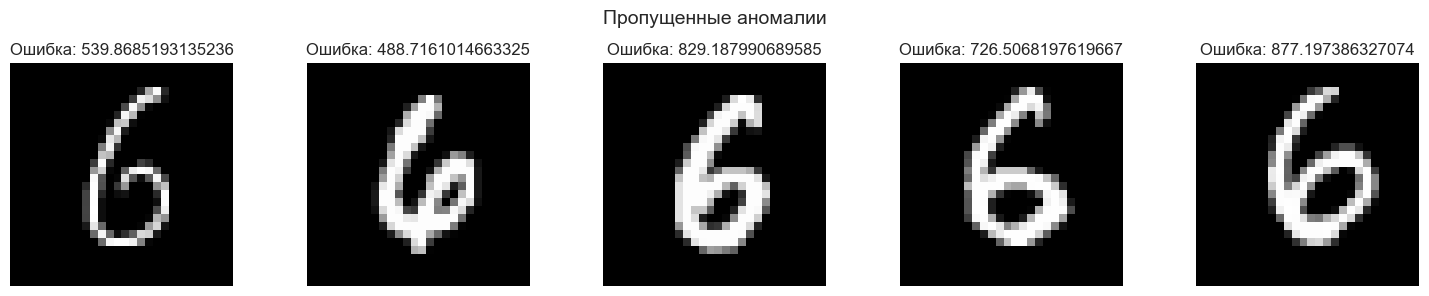

In [361]:
misses = missed_anomalies[:5]
original_format = scaler.inverse_transform(X_test[misses])

fig, axes = plt.subplots(1, min(5, len(misses)), figsize=(15, 3))

for i, idx in enumerate(misses):
    img = original_format[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Ошибка: {best_errors[idx]}')
    axes[i].axis('off')

plt.suptitle('Пропущенные аномалии', fontsize=14)
plt.tight_layout()
plt.show()

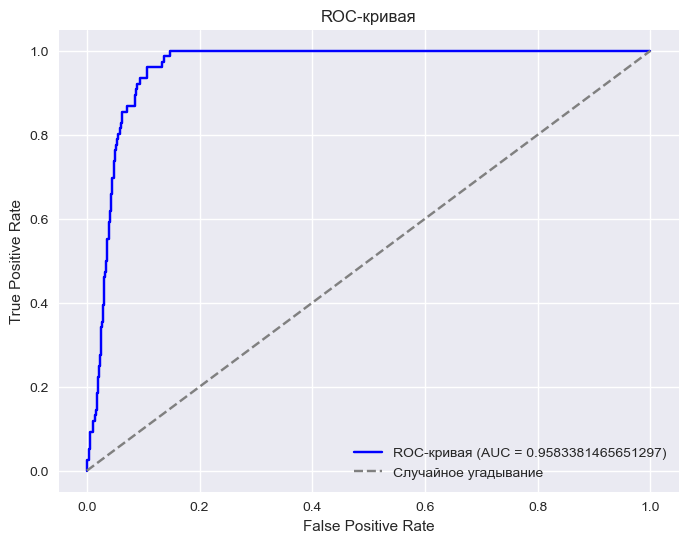

In [364]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, errors)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {roc_auc})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Случайное угадывание')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


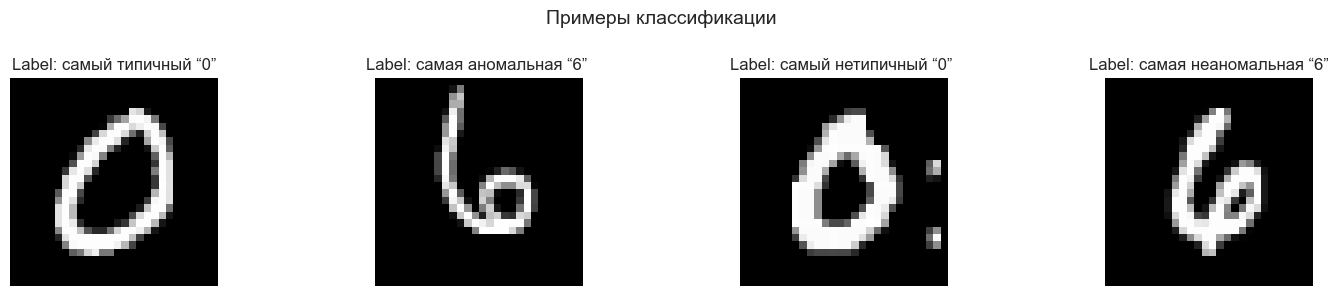

In [ ]:
tn_index = np.where((df_label == 0) & (y_pred == 0))[0][np.argmin(errors[(df_label == 0) & (y_pred == 0)])]
tp_index = np.where((df_label == 6) & (y_pred == 1))[0][np.argmax(errors[(df_label == 6) & (y_pred == 1)])]
fp_index = np.where((df_label == 0) & (y_pred == 1))[0][np.argmax(errors[(df_label == 0) & (y_pred == 1)])]
fn_index = np.where((df_label == 6) & (y_pred == 0))[0][np.argmin(errors[(df_label == 6) & (y_pred == 0)])]

selected_imgs = df_no_label.iloc[[tn_index, tp_index, fp_index, fn_index]]
selected_labels = pd.Series(["самый типичный “0”", "самая аномальная “6” ", "самый нетипичный “0” ", "самая неаномальная “6”"])

show_images(selected_imgs, selected_labels, n=4, title="Примеры классификации")
